In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('./Cuisine_rating.csv')

In [6]:
df

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No
196,197,170,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No
197,198,160,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No
198,199,130,"St. George,NY",Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [8]:
df.isnull().mean()

User ID           0.0
Area code         0.0
Location          0.0
Gender            0.0
YOB               0.0
Marital Status    0.0
Activity          0.0
Budget            0.0
Cuisines          0.0
Alcohol           0.0
Smoker            0.0
Food Rating       0.0
Service Rating    0.0
Overall Rating    0.0
Often A S         0.0
dtype: float64

In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [10]:
df['Age']=[2022-YOB for YOB in df['YOB']]
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Age
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,16
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,31
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,45
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,66
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,25


In [11]:
df.columns

Index(['User ID', 'Area code', 'Location', 'Gender', 'YOB', 'Marital Status',
       'Activity', 'Budget', 'Cuisines', 'Alcohol ', 'Smoker', 'Food Rating',
       'Service Rating', 'Overall Rating', 'Often A S', 'Age'],
      dtype='object')

In [12]:
df.drop(columns=['User ID','Area code','YOB'],inplace=True)
df.head()

,Location,Gender,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Age
0,"Upper East Side,NY",Female,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,16
1,"St. George,NY",Female,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,31
2,"Upper West Side,NY",Male,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,45
3,"Upper East Side,NY",Female,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,66
4,"Central Park,NY",Male,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,25


##  LOCATION__-__ 	  Upper West Side,NY_ _--EDI__

In [13]:
def sort_loc(Location):
    df_loc=df[df.Location==Location]
    df_loc.drop(columns='Location',inplace=True)
    return df_loc


In [18]:
df_Upper_West_Side=sort_loc('Upper West Side,NY')
df_Upper_West_Side

,Gender,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Age
2,Male,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,45
32,Male,Single,Professional,3,Indian,Often,Never,3,2,2.5,No,27
47,Female,Married,Professional,3,Seafood,Never,Socially,1,5,3.0,No,35
55,Female,Single,Professional,4,Filipino,Often,Socially,3,1,2.0,No,31
59,Male,Married,Professional,5,Italian,Socially,Socially,2,2,2.0,No,63
61,Female,Divorced,Professional,4,Japanese,Never,Often,5,5,5.0,No,67
82,Male,Married,Student,4,French,Often,Socially,2,4,3.0,No,26
88,Female,Married,Professional,4,French,Often,Often,5,5,5.0,Yes,19
96,Female,Married,Student,4,Chinese,Never,Often,1,2,1.5,No,22
102,Male,Single,Student,5,Seafood,Often,Often,4,2,3.0,Yes,45


<function matplotlib.pyplot.show(close=None, block=None)>

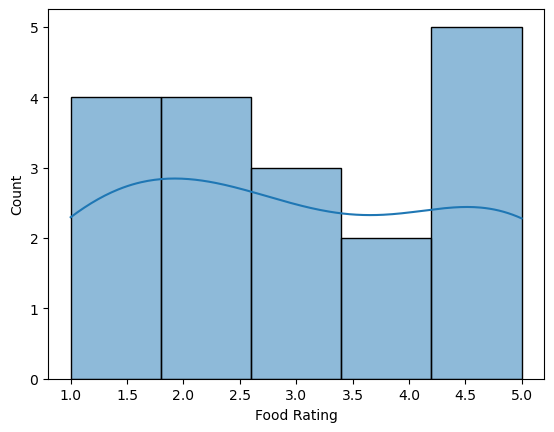

In [20]:
sns.histplot(data=df_Upper_West_Side,x='Food Rating',bins=5,kde=True)
plt.show

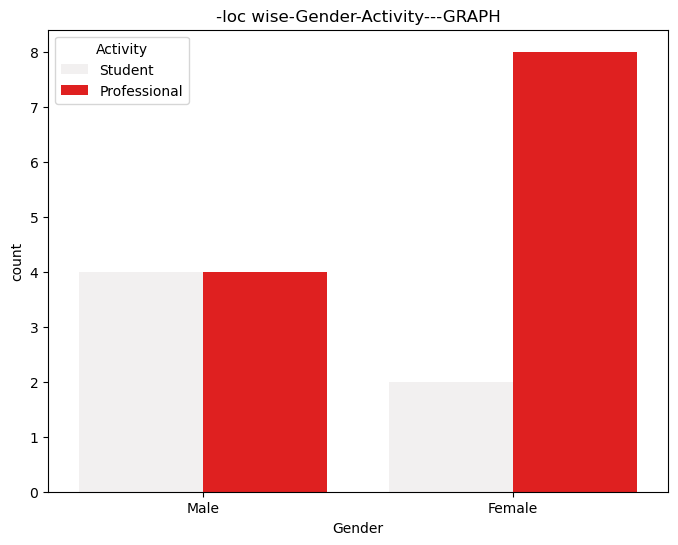

In [37]:

plt.figure(figsize=(8,6))
plt.title('-loc wise-Gender-Activity---GRAPH')
sns.countplot(data=df_Upper_West_Side,x='Gender',hue='Activity',color=('red'))
plt.show()

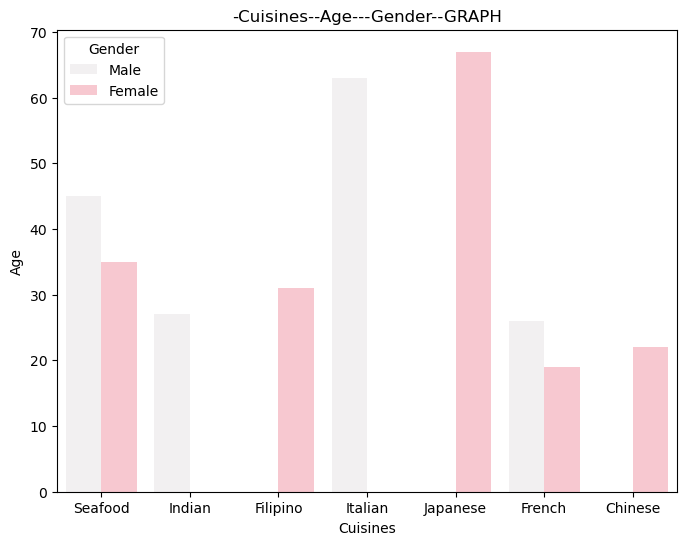

In [38]:
plt.figure(figsize=(8,6))
sns.barplot(data=df_Upper_West_Side,x='Cuisines',y='Age',hue='Gender',color='pink')
plt.title('-Cuisines--Age---Gender--GRAPH')
plt.show()


#  which food item has more rating and which Gender put that rate more??

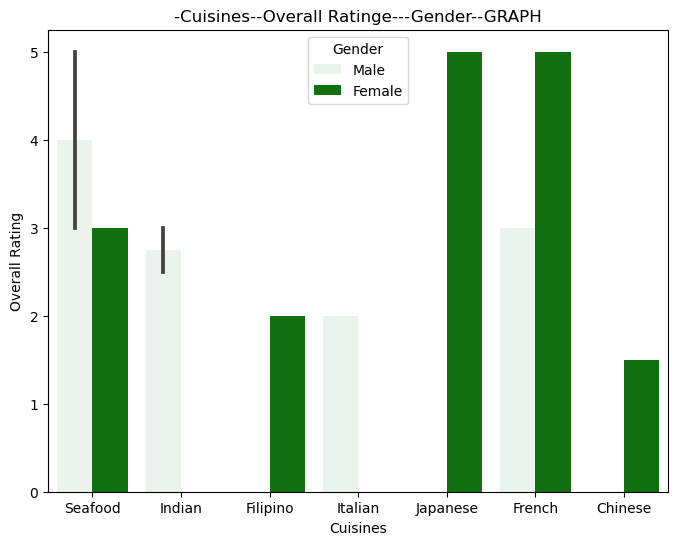

In [39]:
plt.figure(figsize=(8,6))
sns.barplot(data=df_Upper_West_Side,x='Cuisines',y='Overall Rating',hue='Gender',color='green')
plt.title('-Cuisines--Overall Ratinge---Gender--GRAPH')
plt.show()


# CUSTOMER _REG_ VISIT__ GENDER,__AGE, AT THAT LOC

In [40]:
df_Upper_West_Side.head()

,Gender,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Age
2,Male,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,45
32,Male,Single,Professional,3,Indian,Often,Never,3,2,2.5,No,27
47,Female,Married,Professional,3,Seafood,Never,Socially,1,5,3.0,No,35
55,Female,Single,Professional,4,Filipino,Often,Socially,3,1,2.0,No,31
59,Male,Married,Professional,5,Italian,Socially,Socially,2,2,2.0,No,63


# Which type of customer comes more frequend and age?

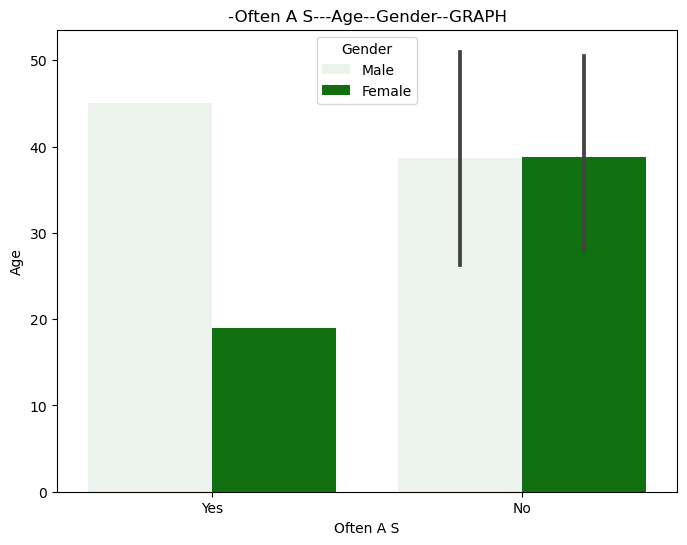

In [44]:

plt.figure(figsize=(8,6))
sns.barplot(data=df_Upper_West_Side,x='Often A S',y='Age',hue='Gender',color='green')
plt.title('-Often A S---Age--Gender--GRAPH')
plt.show()


# WHICH FOOD HAVE MORE BUDGET AND AGE OF CUSTOMER  TO EAT

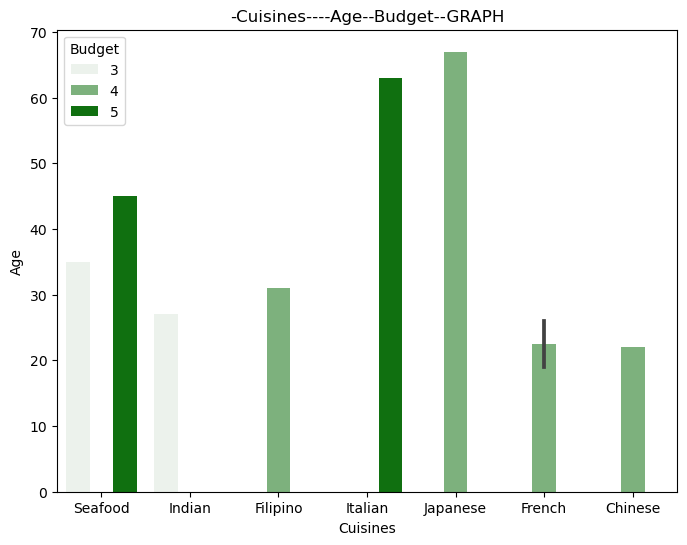

In [47]:
plt.figure(figsize=(8,6))
sns.barplot(data=df_Upper_West_Side,x='Cuisines',y='Age',hue='Budget',color='green')
plt.title('-Cuisines----Age--Budget--GRAPH')
plt.show()


#  -----Activity-==-Profes__-Gender==Female-__-EDI-----  

In [1]:
def sort_act(Activity):
    df_act=df[df.Activity==Activity]
    df_act.drop(columns='Activity',inplace=True)
    return df_act

In [58]:
 df_prof=sort_act('Professional')
df_prof.reset_index(drop=True,inplace=True)
    

In [75]:
df_prof

,Location,Gender,Marital Status,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Age
0,"Upper East Side,NY",Female,Single,3,Japanese,Never,Never,5,4,4.5,No,16
1,"Upper East Side,NY",Female,Married,5,Japanese,Never,Socially,3,1,2.0,No,66
2,"China Town, NY",Female,Married,5,Indian,Often,Socially,1,4,2.5,No,45
3,"Upper East Side,NY",Female,Single,3,Filipino,Often,Often,5,2,3.5,Yes,19
4,"St. George,NY",Female,Married,4,French,Never,Often,3,2,2.5,No,47
...,...,...,...,...,...,...,...,...,...,...,...,...
75,"Cedar Hill, NY",Male,Married,4,Indian,Socially,Socially,2,5,3.5,No,62
76,"China Town, NY",Male,Divorced,3,French,Never,Often,3,1,2.0,No,53
77,"St. George,NY",Male,Single,5,French,Never,Often,5,5,5.0,No,22
78,"St. George,NY",Female,Single,4,French,Never,Socially,1,2,1.5,No,40


In [76]:
def df_prof_female_(Gender):
    df_gend=df_prof[df_prof.Gender==Gender]
    df_gend.drop(columns='Gender',inplace=True)
    return  df_gend


#    female__Professional___data Frame_-LOC

In [78]:
df_female_prof=df_prof_female_('Female')
df_female_prof.reset_index(drop=True,inplace=True)
df_female_prof

,Location,Marital Status,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Age
0,"Upper East Side,NY",Single,3,Japanese,Never,Never,5,4,4.5,No,16
1,"Upper East Side,NY",Married,5,Japanese,Never,Socially,3,1,2.0,No,66
2,"China Town, NY",Married,5,Indian,Often,Socially,1,4,2.5,No,45
3,"Upper East Side,NY",Single,3,Filipino,Often,Often,5,2,3.5,Yes,19
4,"St. George,NY",Married,4,French,Never,Often,3,2,2.5,No,47
5,"St. George,NY",Single,5,Chinese,Socially,Never,5,5,5.0,No,16
6,"Upper East Side,NY",Married,5,Italian,Socially,Never,1,4,2.5,No,39
7,"Riverdale,NY",Married,5,Chinese,Never,Often,4,2,3.0,No,51
8,"Central Park,ny",Single,5,Indian,Socially,Socially,1,5,3.0,No,13
9,"St. George,NY",Married,3,Italian,Often,Never,4,1,2.5,No,53


In [73]:
df_female_prof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        40 non-null     object 
 1   Marital Status  40 non-null     object 
 2   Budget          40 non-null     int64  
 3   Cuisines        40 non-null     object 
 4   Alcohol         40 non-null     object 
 5   Smoker          40 non-null     object 
 6   Food Rating     40 non-null     int64  
 7   Service Rating  40 non-null     int64  
 8   Overall Rating  40 non-null     float64
 9   Often A S       40 non-null     object 
 10  Age             40 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 3.6+ KB


In [74]:
df_female_prof.count()

Location          40
Marital Status    40
Budget            40
Cuisines          40
Alcohol           40
Smoker            40
Food Rating       40
Service Rating    40
Overall Rating    40
Often A S         40
Age               40
dtype: int64